In [ ]:
#importing the library  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error

In [ ]:
#reading the data
df=pd.read_csv('/content/DecisionTree_data_heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
#Here picking target weather patients is suffering from Heart diseases or not
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
#0 = patients not suffering from heart disease
#1 = patients suffering from heart disease
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [ ]:
#describe of the data knowing mean,maximum,standard deviation
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#information about the data weather they have null value or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
### Lets do the visualization ###

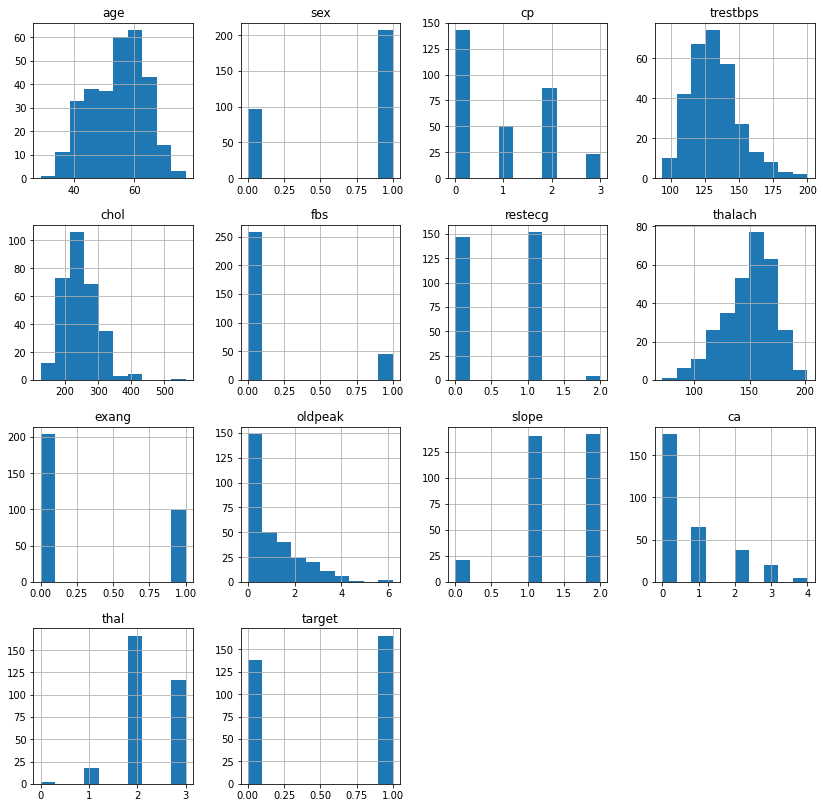

In [ ]:
df.hist(figsize=(14,14))
plt.show()

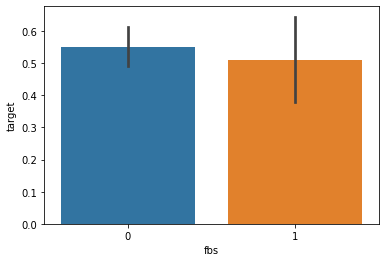

In [ ]:
sns.barplot(x="fbs", y="target", data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



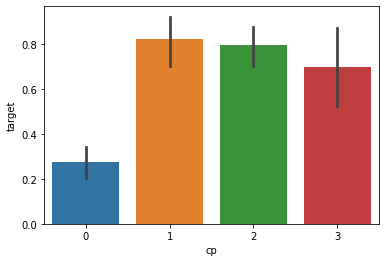

In [ ]:
sns.barplot(df["cp"],df['target'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



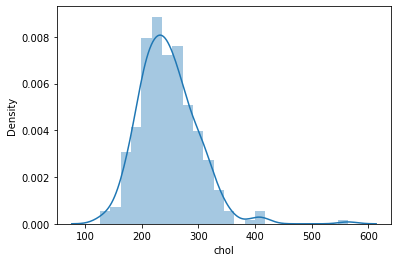

In [ ]:

sns.distplot(df["chol"])

In [ ]:
#sns.pairplot(df[numeric_columns])

1    165
0    138
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



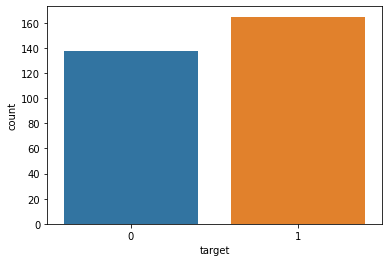

In [ ]:
y=df['target']
sns.countplot(y)
a=df.target.value_counts()
print(a)

In [ ]:
### Data processing ###

In [ ]:
df['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
#lets store in X and y
X,y= df,df.target

In [ ]:
#lets remove target from the data
X.drop('target',axis=1,inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [ ]:
X_test

array([[ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.26098049,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895]])

In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [ ]:
#Lets import DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#lets predict our data on X-test and see the accuracy 
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [ ]:
print(accuracy_dt)  #here we can assume out predictions is 74% correct

74.72527472527473


In [ ]:
prediction

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0])

In [ ]:
X_DT=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])  #random data selection for testing
X_DT_prediction=dt.predict(X_DT)


In [ ]:
print(X_DT_prediction[0]) 


0


In [ ]:
'''As the final result is 0 we can say the person is not suffering from Heart Diseases'''
 